# The trade-weighted U.S. Dollar
## Brian Dew, brianwdew@gmail.com

## Python: Retrieve and plot the trade-weighted dollar
Next we show how Python can be used to gather and plot data on the Fed’s broad index of the foreign exchange value of the dollar. The script gathers data from [Fred](https://research.stlouisfed.org/fred2/series/DTWEXB) and plots each business day’s index value since the start of 2014.

## Gathering data
First, we import pandas, numpy, and matplotlib and give them conventional short names. We will also use datetime and date.

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from datetime import date

Next, we use the pandas_datareader package to request the data from Fred. I’ve found the code for the broad-index trade-weighted dollar, DTWEXB, by searching, but you can also find it on the Fred site by browsing by source (Board of Governors of the Federal Reserve System), or by release (H.10). We paste the series code into the datareader and provide start and end dates, and receive a pandas dataframe.

In [6]:
import pandas_datareader.data as webdata
tstart = datetime.datetime(2014, 1, 1)
#retrieve trade-weighted dollar data from fred
dtwexb = webdata.DataReader("DTWEXB", "fred", tstart);
#display five most recent observations
dtwexb.tail(5)

,DTWEXB
DATE,
2017-03-20,124.6236
2017-03-21,124.3952
2017-03-22,124.3672
2017-03-23,124.3669
2017-03-24,124.1911


When was the last time the measure was as low as its April 12 value?

In [7]:
print dtwexb[119.29>=dtwexb].dropna().tail(2)

              DTWEXB
DATE                
2016-05-02  118.0914
2016-05-03  118.8186


## Line plot of data
Lastly, we can use matplotlib to plot the data. 

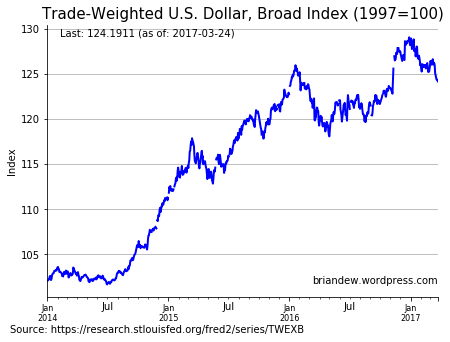

In [8]:
#Create figure and plot dtwexb
fig = plt.figure(figsize=[7,5])
ax1 = plt.subplot(111)
line = dtwexb.DTWEXB.plot(color='blue',linewidth=2)

#Add a title
ax1.set_title('Trade-Weighted U.S. Dollar, Broad Index (1997=100)', fontsize=15)

#Add y label and no x-label since it is dates
ax1.set_ylabel('Index')
ax1.set_xlabel('')

#Axis options
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(axis='x', which='major', labelsize=8)
ax1.yaxis.grid(True)

#Annotate with text
fig.text(0.15, 0.85,'Last: ' + str(dtwexb.DTWEXB[-1]) \
         + ' (as of: ' + str(dtwexb.index[-1].strftime('%Y-%m-%d'))\
         + ')');
url = 'https://research.stlouisfed.org/fred2/series/TWEXB'
fig.text(0.05, 0.025, 'Source: ' + url)
fig.text(0.65, 0.16, 'briandew.wordpress.com')

#Save as png
plt.savefig('dtwexb.png', dpi=1000)